# Refugee Data: Where, When & How #

### Group members: Camille Stacho, Julia D'Zmura, Jordan Mess ###

#### Introduction: ####

For this project, we wanted to gain insight into refugees. As we are alarmed by the current events happening at the border, we wanted to show that using historical data could prepare a country for how and when to expect refugees, and also to debunk biases that people have about what refugees are supposed to be like. The purpose of this tutorial is to teach others how to gather data from multiple sources and apply it to current events to answer important questions. 


In this tutorial, we will show how to gather data, clean it up, make graphs and other data visualizations, and extract conclusions from this whole process.

#### Required Tools ####

- requests
- pandas

Current resources:
   - [WRAPS](http://www.wrapsnet.org/admissions-and-arrivals/)
   - [Homeland Security](https://www.dhs.gov/immigration-statistics/refugees-asylees)


The following things are required imports. We used these libraries to work with dataframes, arrays, and to make plots.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [25]:
df = pd.read_csv('data/past10.csv')
df.columns = ['Country/territory of asylum/residence', 'Origin', 'Year','Month','Value']
df = df.iloc[3:]

In [26]:
df=df.replace('USA (EOIR)', 'USA')
df=df.replace('USA (INS/DHS)', 'USA')

df.head()

,Country/territory of asylum/residence,Origin,Year,Month,Value
3,Australia,Afghanistan,1999,January,8
4,Australia,Afghanistan,1999,February,10
5,Australia,Afghanistan,1999,March,25
6,Australia,Afghanistan,1999,April,25
7,Australia,Afghanistan,1999,May,7


The first thing we will analyze with this data is how we can compare different countries, and see the difference of the amount of refugees coming to countries in just one year. We chose the countries of Germany, Norway, France and the USA. All of these countries are often in the news for accepting or denying refugees. The following code will be used to see the difference in 1999 and 2000 for the amount of refugees accepted in each country. 

We will clean up the data by choosing only the countries we are interested in. Then we will change the the column type to be an integer so we can plot it. We will then group by country and year, to get the country and year information that we want. After we have that, we will choose only the years 1999 and 2000 to compare that.

In [27]:
country_df = df.loc[df['Country/territory of asylum/residence'] == 'USA']
country_df = country_df.append(df.loc[df['Country/territory of asylum/residence'] == 'Germany'])
country_df = country_df.append(df.loc[df['Country/territory of asylum/residence'] == 'France'])
country_df = country_df.append(df.loc[df['Country/territory of asylum/residence'] == 'Norway'])

country_df['Value'] = pd.to_numeric(country_df['Value'])
country_df = country_df.groupby(['Country/territory of asylum/residence','Year'])['Value'].sum()
country_df=country_df.reset_index()


In [28]:
df1999=country_df.loc[country_df['Year'] == '1999']
df2000=country_df.loc[country_df['Year'] == '2000']

Once we have the code all cleaned up, we can then plot the years against each other. Each bar will represent a country, and the orange will represent the 2000 data and the blue will represent the 1999 data.

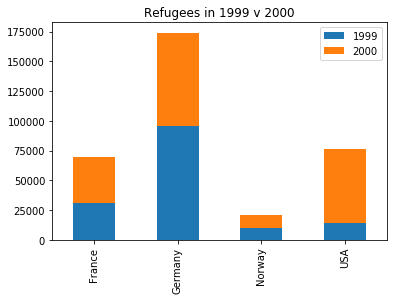

In [93]:
index= ['France','Germany','Norway','USA']
firstyear = df1999['Value'].values
secondyear = df2000['Value'].values


df = pd.DataFrame({'1999': firstyear,'2000': secondyear}, index=index)
ax = df.plot.bar(stacked=True,title="Refugees in 1999 v 2000")

From this graph, we can see that Germany had a much higher percentage of refugees in both years. USA had many more refugees in 2000 then in 1999. France and Norway stayed the same, although they were both much lower than the US and Germany.

From this we may gather a question: What happened in the USA that so many refugees were accepted, only a year apart? 

The next thing we will explore is the amount of people coming to the USA from 1975 to 2018, to see what parts of the world they are coming from. This will give us insight into what groups of people are coming into the US at what times.

The first thing we will do is gather data, rename the columns and clean up the data.

In [30]:
dff = pd.read_csv('data/yearstate.csv')
dff.columns = ['Year', 'Africa', 'Asia','NAN','Europe','Union','Kosovo','Caribbean','South Asia','PSI','Total', 'Nan']
dff = dff.iloc[8:].reset_index()
dff = dff.drop(columns=['NAN','Nan','index'])

dff=dff.iloc[:45]

In [31]:
dff['Europe'] = dff['Europe'].str.replace(',', '')
dff['Asia'] = dff['Asia'].str.replace(',', '')
dff['Caribbean'] = dff['Caribbean'].str.replace(',', '')
dff['Africa'] = dff['Africa'].str.replace(',', '')


Once the data is cleaned up, we can plot the countries versus the years. We will use another stacked bar plot to emphasize the proportions of each type of group coming into the US every year.

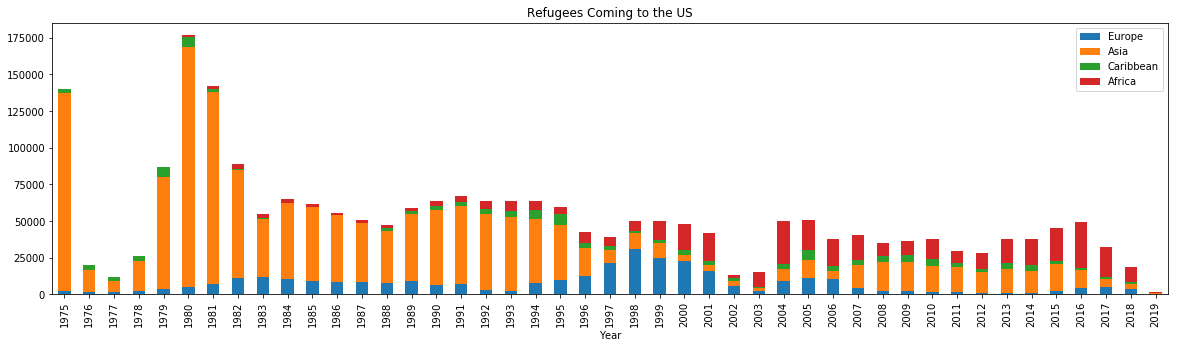

In [91]:
index1 = dff['Year']
europe = pd.to_numeric(dff['Europe'].values)
asia = pd.to_numeric(dff['Asia'].values)
caribbean = pd.to_numeric(dff['Caribbean'].values)
africa = pd.to_numeric(dff['Africa'].values)

data = pd.DataFrame({'Europe': europe,'Asia': asia, 'Caribbean': caribbean, 'Africa':africa}, index=index1)
ax1 = data.plot.bar(stacked=True,figsize=(20,5),title="Refugees Coming to the US")


From this graph, we can see that there was a very large spike of refugees from Asia around 1975-1996. 

The next thing we will explore is European Union countries. This will allow us to compare it with other countries historical data as well!

We will first gather new data, and clean it up again by dropping certain columns and renaming. After that, we will plot it below.

In [85]:
df = pd.read_csv('data/world_data.csv')
df = df.drop('Indicator Code',axis=1)
df = df.drop('Indicator Name',axis=1)
df= df.drop(df.iloc[:,2:32],axis=1)
df = df.fillna(0)

In [86]:
figure(num=None, figsize=(13, 7), dpi=80, facecolor='w', edgecolor='k')
germ = df.loc[df['Country Code'] == 'DEU']
germ_x=np.array(germ.columns.values)[2:-1]
germ_y=np.array(germ.loc[:,'1990':])[0][:-1]


<Figure size 1040x560 with 0 Axes>

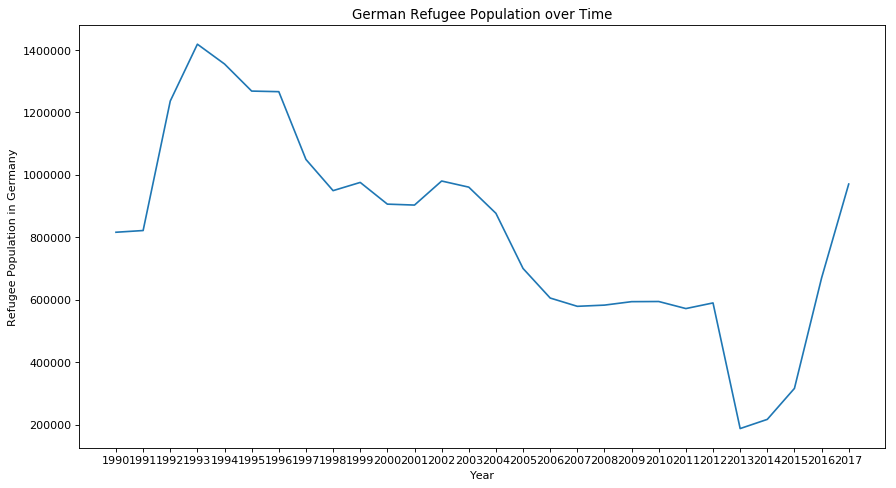

In [37]:
figure(num=None, figsize=(13, 7), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Year')
plt.ylabel('Refugee Population in Germany')
plt.title('German Refugee Population over Time')
plt.plot(germ_x,germ_y)

From this ---

We will now do the same thing, but for France. This data was obtained from **French Asylum Seekers over Time**<br>
Data from Worldbank: https://data.worldbank.org/indicator/SM.POP.REFG

In [38]:
france = df.loc[df['Country Code'] == 'FRA']
franc_x=np.array(france.columns.values)[2:-1]
franc_y=np.array(france.loc[:,'1990':])[0][:-1]


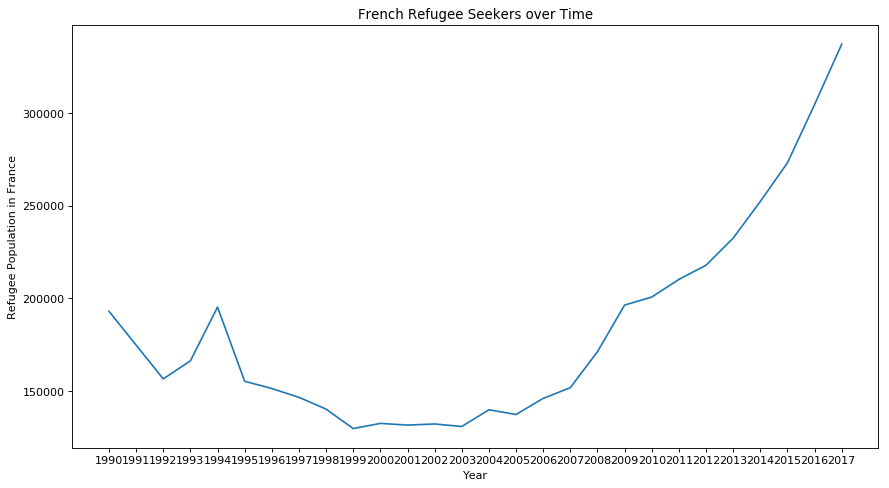

In [39]:
figure(num=None, figsize=(13, 7), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Year')
plt.ylabel('Refugee Population in France')
plt.title('French Refugee Seekers over Time')
plt.plot(franc_x,franc_y)

We will now do the same for USA

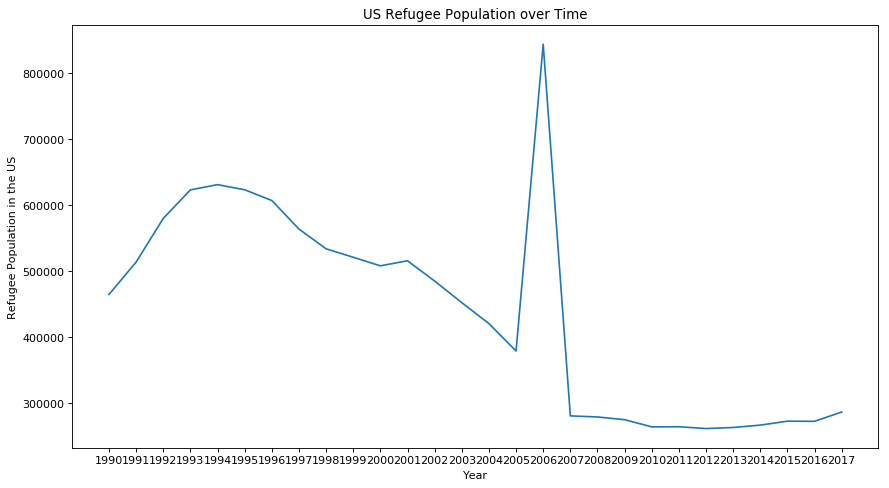

In [40]:
usa = df.loc[df['Country Code'] == 'USA']
usa_x=np.array(usa.columns.values)[2:-1]
usa_y=np.array(usa.loc[:,'1990':])[0][:-1]
from matplotlib.pyplot import figure
figure(num=None, figsize=(13, 7), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Year')
plt.ylabel('Refugee Population in the US')
plt.title('US Refugee Population over Time')
plt.plot(usa_x,usa_y)

We will now do the same for the UK!

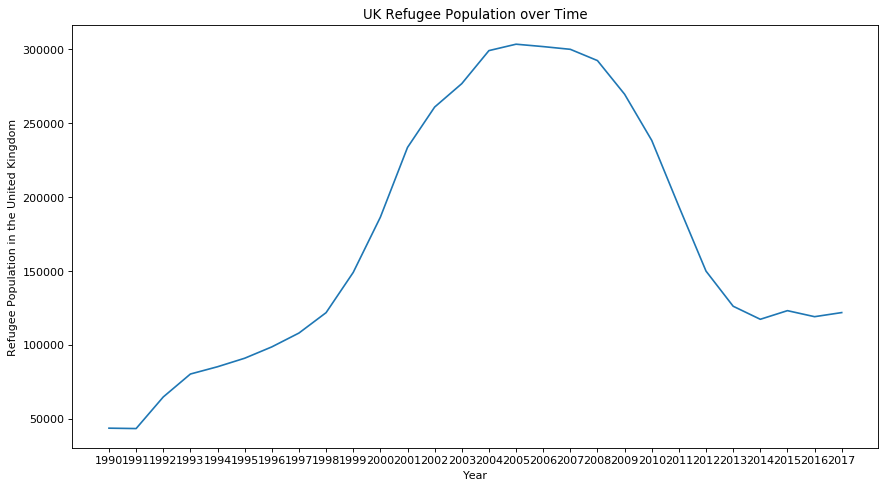

In [41]:
uk = df.loc[df['Country Code'] == 'GBR']
uk_x=np.array(uk.columns.values)[2:-1]
uk_y=np.array(uk.loc[:,'1990':])[0][:-1]
figure(num=None, figsize=(13, 7), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Year')
plt.ylabel('Refugee Population in the United Kingdom')
plt.title('UK Refugee Population over Time')
plt.plot(uk_x,uk_y)

Now, it may seem tough to compare these plots because they're all showing up separately. So, we will make this analysis easier on ourselves by plotting all of these lines onto one big graph. The legend will tell us which line is which, and we can easily compare over time!

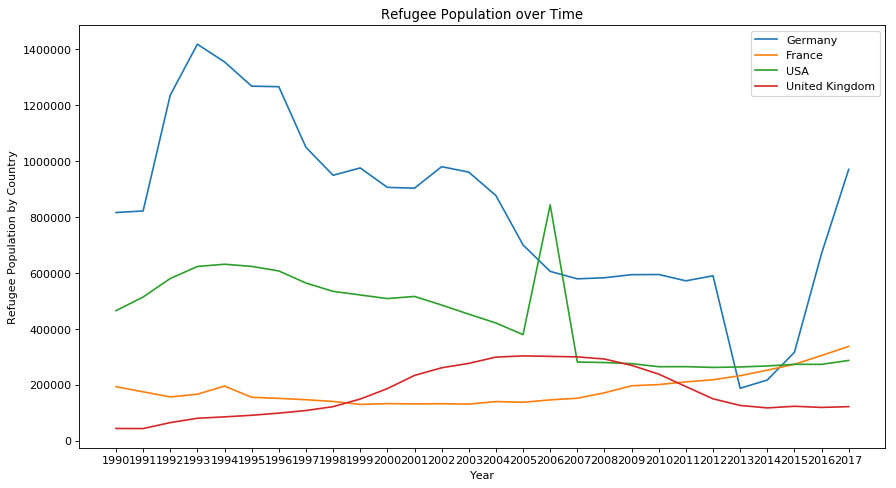

In [42]:
figure(num=None, figsize=(13, 7), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Year')
plt.ylabel('Refugee Population by Country')
plt.title('Refugee Population over Time')
germany = plt.plot(germ_x, germ_y)
france = plt.plot(franc_x, franc_y)
usa = plt.plot(usa_x, usa_y)
uk = plt.plot(uk_x, uk_y)
plt.legend(('Germany','France','USA','United Kingdom'))
plt.show()

Based on this graph, 

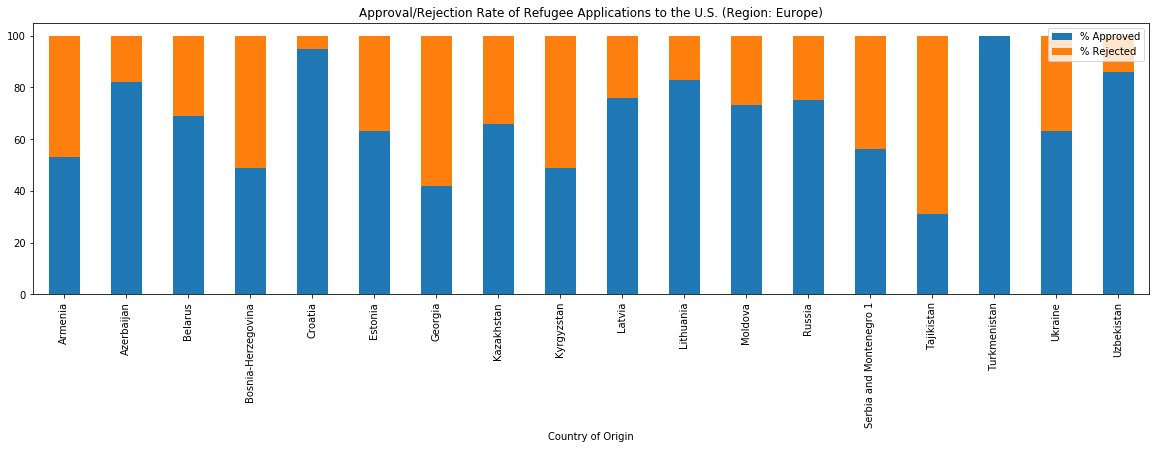

In [95]:
##Homeland security for % approved per country: 
df = pd.read_csv('HomeLandSecurity/RefugeeApplications/2004table13CSV.csv')
df = df.drop(columns="Unnamed: 1")
df = df.drop(columns="Unnamed: 2")
df = df.drop(columns="Unnamed: 3")
df = df.drop(columns="Unnamed: 4")
df = df.drop(columns="Unnamed: 6")
df = df.drop(columns="Unnamed: 7")
df = df.drop(columns="Unnamed: 8")
df = df.drop(columns="Unnamed: 9")
df = df.drop(columns="Unnamed: 10")
df = df.drop(columns="Unnamed: 11")
df.columns = ['Region and country of birth', 'Percent approved']
df_europe = df.iloc[9:27]

index= df_europe['Region and country of birth'].values
percentApproved = pd.to_numeric(df_europe['Percent approved']).values
percentRejected = 100 - pd.to_numeric(df_europe['Percent approved']).values

df_new = pd.DataFrame({'% Approved': percentApproved, '% Rejected':percentRejected }, index=index)
ax1 = df_new.plot.bar(stacked=True,figsize=(20,5));
ax1.set_xlabel('Country of Origin');
ax1.set_title('Approval/Rejection Rate of Refugee Applications to the U.S. (Region: Europe)');

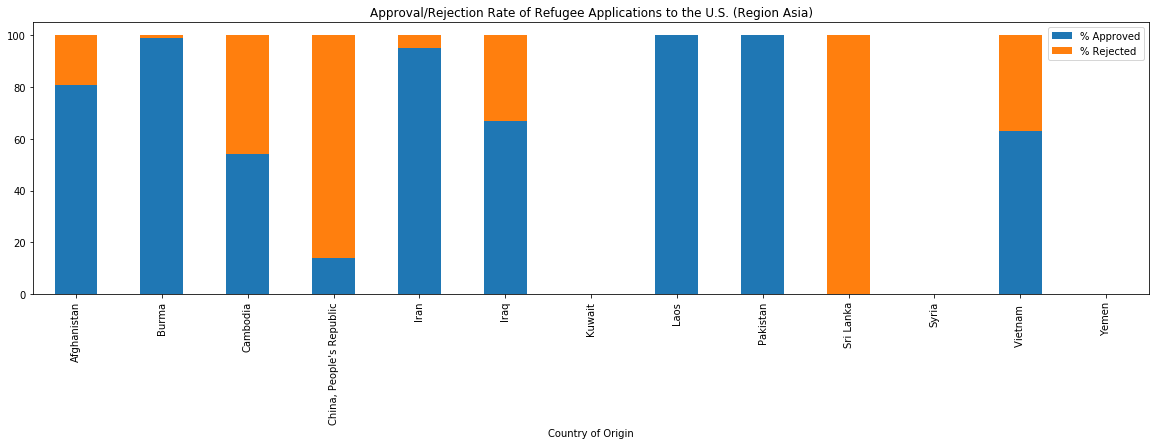

In [96]:
df_asia = df.iloc[28:41]
index= df_asia['Region and country of birth'].values
percentApproved = pd.to_numeric(df_asia['Percent approved']).values
percentRejected = 100 - pd.to_numeric(df_asia['Percent approved']).values

df_new = pd.DataFrame({'% Approved': percentApproved, '% Rejected':percentRejected }, index=index)
ax1 = df_new.plot.bar(stacked=True,figsize=(20,5))
ax1.set_xlabel('Country of Origin');
ax1.set_title('Approval/Rejection Rate of Refugee Applications to the U.S. (Region Asia)');

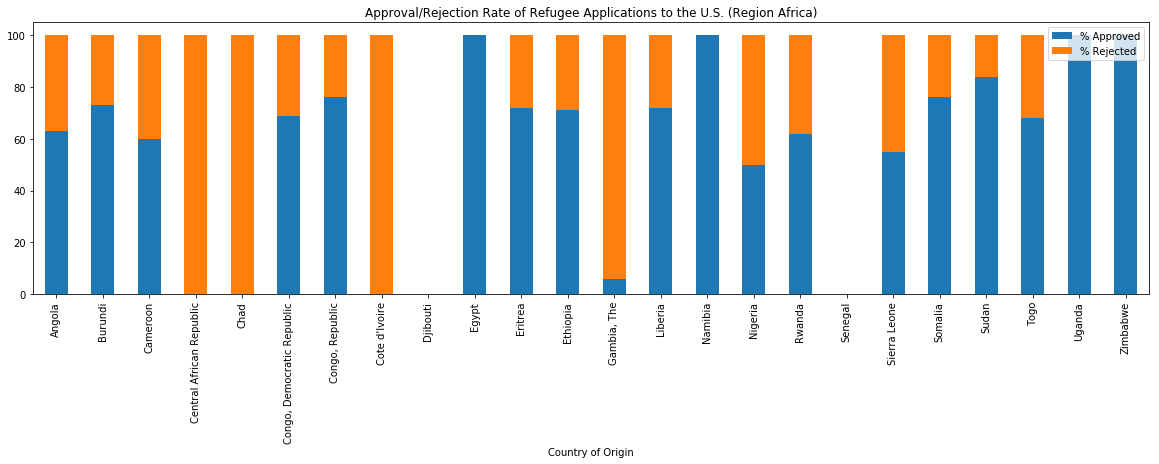

In [97]:
df_africa = df.iloc[42:66]
index= df_africa['Region and country of birth'].values
percentApproved = pd.to_numeric(df_africa['Percent approved']).values

percentRejected = 100 - pd.to_numeric(df_africa['Percent approved']).values

df_new = pd.DataFrame({'% Approved': percentApproved, '% Rejected':percentRejected }, index=index)
ax1 = df_new.plot.bar(stacked=True,figsize=(20,5))
ax1.set_xlabel('Country of Origin');
ax1.set_title('Approval/Rejection Rate of Refugee Applications to the U.S. (Region Africa)');

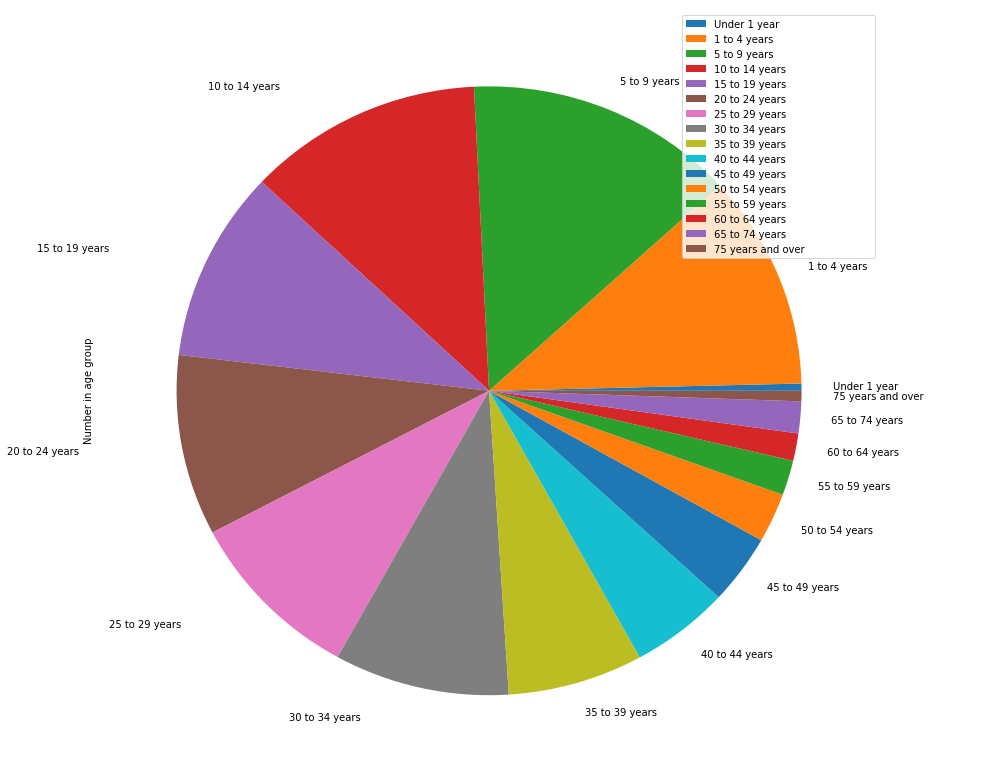

In [98]:
##Homeland security for age in the U.S.: 
df = pd.read_excel('HomeLandSecurity/RefugeeArrivalsOther/2016table15.xls')
df.columns = ['Characteristic', 'Total', 'Principal Applicants', 'Spouses', 'Children']
df = df.drop(columns="Principal Applicants")
df = df.drop(columns="Spouses")
df = df.drop(columns="Children")
df_age = df.iloc[10:26]
df_age = df_age.replace(to_replace = "-", value = "0")
df_age = df_age.replace(to_replace = "D", value = "0")

index= df_age['Characteristic'].values
value = pd.to_numeric(df_age['Total']).values

df_new = pd.DataFrame({'Number in age group': value}, index=index)
ax1 = df_new.plot.pie(y='Number in age group', figsize=(14,14))

Based on how many people come, what is the chance of being accepted?

The next thing we will explore is why are these people getting rejected? In order to do this, we will gather data about rejections. We will then plot this data, and see by country, what are the most often types of rejections. We will do this using a stacked bar plot.

In [88]:
df11 = pd.read_csv('data/asluym-rejections.csv')
df11 = df11.drop(columns=['Unnamed: 5', 'Unnamed: 6'])
df11 = df11.loc[2:]
df11 = df11.rename(columns = {'Unnamed: 0':'Country'})
df11 = df11.dropna()
df11.head()


,Country,Refugee status,Subsidiary protection,Humanitarian reasons,Rejected
2,Ireland,75.5,5.8,7.2,11.5
3,Lithuania,74.0,3.5,0.0,22.5
4,Latvia,9.2,65.0,0.0,25.8
5,Malta,15.1,52.6,1.1,31.3
6,Slovakia,1.1,24.2,42.9,31.9


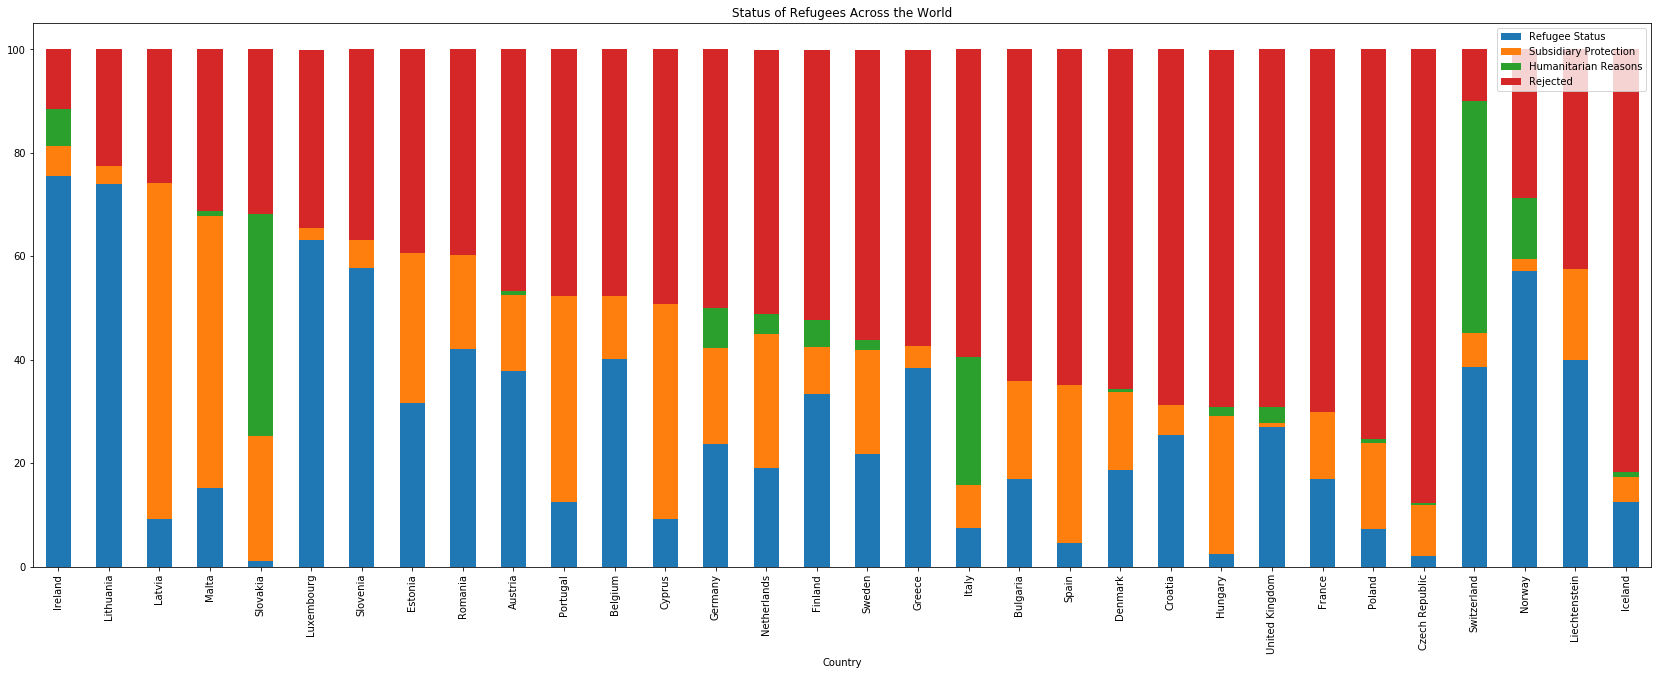

In [94]:
index1 = df11['Country']

refugeestatus = pd.to_numeric(df11['Refugee status'].values)
subsidiaryprotection = pd.to_numeric(df11['Subsidiary protection'].values)
humanitarian = pd.to_numeric(df11['Humanitarian reasons'].values)
rejected = pd.to_numeric(df11['Rejected'].values)

data2 = pd.DataFrame({'Refugee Status': refugeestatus,'Subsidiary Protection': subsidiaryprotection, 'Humanitarian Reasons': humanitarian, 'Rejected':rejected}, index=index1)
ax2 = data2.plot.bar(stacked=True,figsize=(29,10), title="Status of Refugees Across the World")

This graph can give us a lot of insight into how countries react to certain refugees. As we can see here, the Czech Republic has the highest rates of rejection, and Ireland and Switzerland have the lowest rates of rejection. Latvia has the highest rates of subsidiary protection, while the United Kingdom and Norway have the lowest rates of subsidiary protection. For humanitarian reasons, Slovakia, Italy and Switzerland have the highest rates. And finally, for accepted refguee status, Ireland and Lithuania have highest rates, and Slovakia, Hungary and the Czech Republic has the lowest rates.